In [4]:
from gdt.core import data_path

### Definiendo los paths a mano
object_no = '090926181'
object_name = f'bn{object_no}'
common_str = f'datos/{object_no}/glg_cspec_'
filepaths = [
    f"{common_str}b0_{object_name}_v00.pha"
    , f"{common_str}n0_{object_name}_v00.pha"
    , f"{common_str}n1_{object_name}_v00.pha"
    , f"{common_str}n7_{object_name}_v00.pha" ### detector escogido
]

In [5]:
from gdt.missions.fermi.gbm.phaii import GbmPhaii

# open the downloaded data
cspec_n3=GbmPhaii.open(filepaths[3]) 

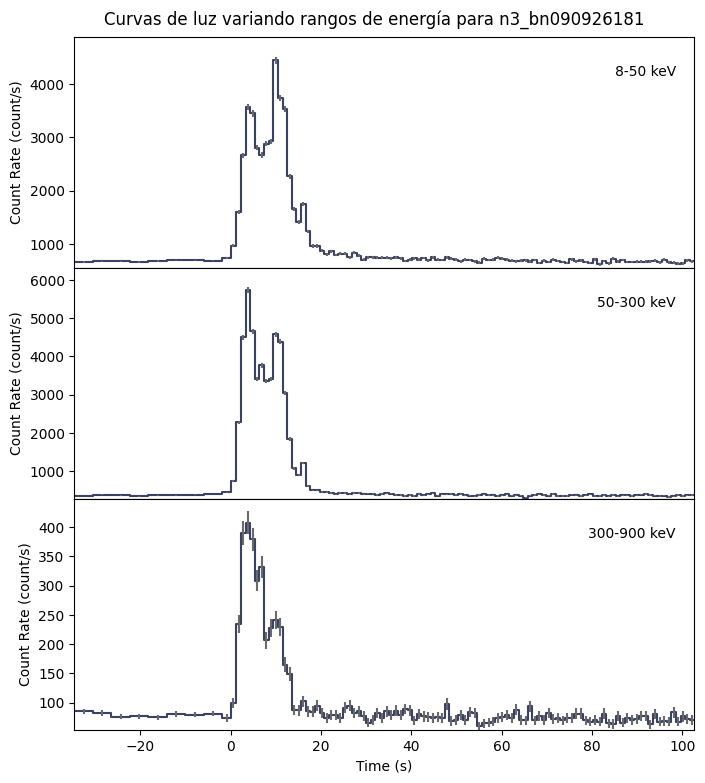

In [6]:
import matplotlib.pyplot as plt
from gdt.core.plot.lightcurve import Lightcurve

# definimos los tres rangos de energía
range1 = (8.0, 50.0)
range2 = (50.0, 300.0)
range3 = (300.0, 900.0)

t_r = (-33, 102)

# Creamos los datos de la curva de luz para cada rango de energía
lc_data1 = cspec_n3.to_lightcurve(time_range=t_r, energy_range=range1)
lc_data2 = cspec_n3.to_lightcurve(time_range=t_r, energy_range=range2)
lc_data3 = cspec_n3.to_lightcurve(time_range=t_r, energy_range=range3)

# Creamos una figura y los ejes para las gráficas, compartiendo el eje x
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 9))
fig.subplots_adjust(hspace=0)

# Graficamos cada curva de luz en su respectivo eje
lightcurve_b0 = Lightcurve(data=lc_data1, ax=ax1)
lightcurve_b1 = Lightcurve(data=lc_data2, ax=ax2)
lightcurve_b2 = Lightcurve(data=lc_data3, ax=ax3)

ax1.text(0.97, 0.88, '8-50 keV',
         transform=ax1.transAxes,
        #  fontsize=12,
         verticalalignment='top',
         horizontalalignment='right')

ax2.text(0.97, 0.88, '50-300 keV',
         transform=ax2.transAxes,
        #  fontsize=12,
         verticalalignment='top',
         horizontalalignment='right')

ax3.text(0.97, 0.88, '300-900 keV',
         transform=ax3.transAxes,
        #  fontsize=12,
         verticalalignment='top',
         horizontalalignment='right')

# Mostramos la gráfica
fig.suptitle(f'Curvas de luz variando rangos de energía para n3_{object_name}', y=0.91)
plt.savefig(r'imagenes/lc_n3.png', bbox_inches='tight')
plt.show()

Generamos una curva de luz y su espectro

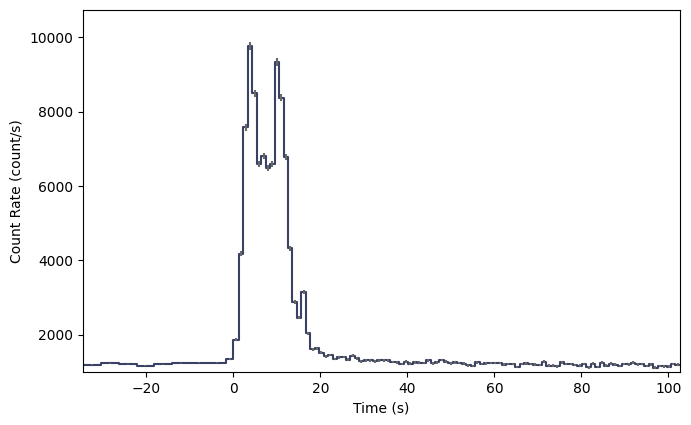

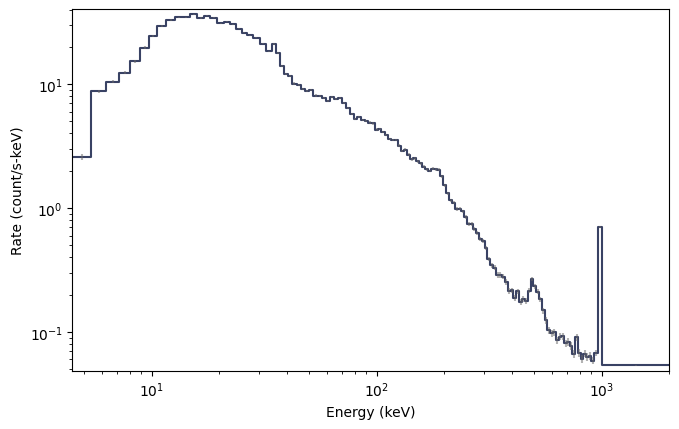

In [7]:
from gdt.core.plot.lightcurve import Lightcurve
from gdt.core.plot.spectrum import Spectrum

import matplotlib.pyplot as plt

t_r = (-33, 102)

# create and show a plot of the lightcurve using data from the b0 detector
lightcurve_b0 = Lightcurve(data=cspec_n3.to_lightcurve(time_range=t_r))
plt.show(lightcurve_b0)

# create and show a plot of the count spectrum using data from the b0 detector
specplot_b0 = Spectrum(data=cspec_n3.to_spectrum(time_range=t_r))
plt.show(specplot_b0)